#### **Ex 1**: Tạo ra 1 bộ dataset từ 10 điểm dữ liệu sinh ra từ hàm y = x^2 + noise.
- Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Sau đó thêm 100 dữ liệu nữa xem hàm đa thức bậc 9 như nào?
-
Hãy báo cáo MSE và vẽ đồ thị trong hai trường hợp (10 điểm dữ liệu ban đầu và 100 điểm dữ liệu sau)
Hiện tượng gì đang xảy ra?

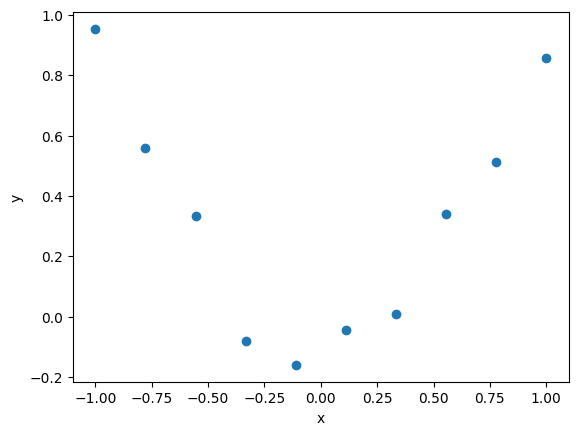

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo ra 10 điểm dữ liệu
x = np.linspace(-1, 1, 10)
y = x**2 + np.random.normal(0, 0.1, 10)

# Vẽ biểu đồ
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

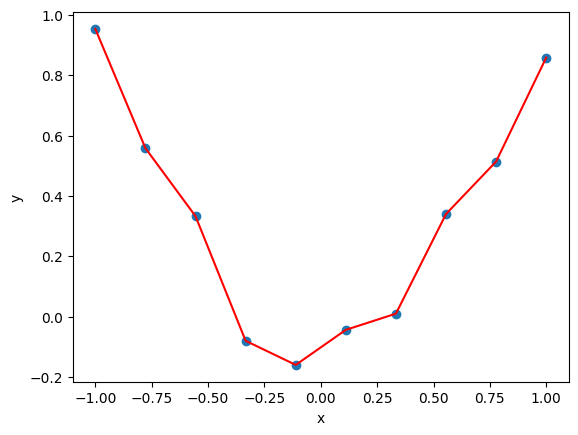

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def pred(x, y):
    # Tạo ra hàm đa thức bậc 9
    poly = PolynomialFeatures(degree=9)
    x_poly = poly.fit_transform(x.reshape(-1, 1))

    # Tạo ra mô hình hồi quy tuyến tính
    model = LinearRegression()
    model.fit(x_poly, y)

    # Dự đoán giá trị y
    y_pred = model.predict(x_poly)
    return y_pred

# Vẽ biểu đồ
y_pred = pred(x, y)
plt.plot(x, y, 'o')
plt.plot(x, y_pred, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

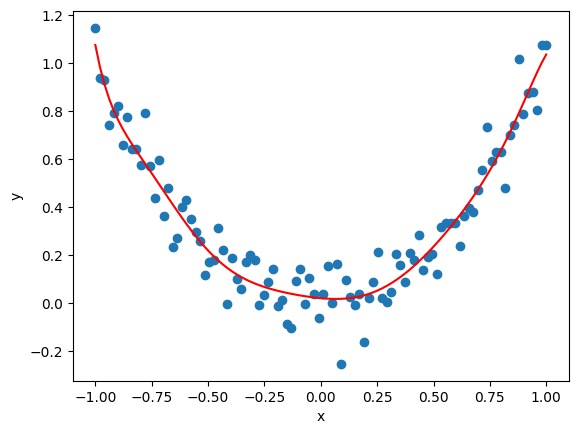

In [ ]:
# Tạo ra 100 dữ liệu nữa
x_new = np.linspace(-1, 1, 100)
y_new = x_new**2 + np.random.normal(0, 0.1, 100)


y_pred_new = pred(x_new, y_new)
# Vẽ biểu đồ
plt.plot(x_new, y_new, 'o')
plt.plot(x_new, y_pred_new, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Tính MSE 10 điểm
MSE10 = np.mean((y - y_pred)**2)
print("MSE của 10 điểm = ", MSE10)
# Tính MSE 100 điểm
MSE100 = np.mean((y_new - y_pred_new)**2)
print("MSE của 100 điểm = ", MSE100)

MSE của 10 điểm =  1.0373622014978386e-29
MSE của 100 điểm =  0.007932691859143854


Xảy ra tình trạng overfitting. Hàm đa thức bậc 9 đã học quá nhiều thông tin từ 10 điểm dữ liệu ban đầu. Điều này dẫn đến hàm đa thức có khả năng dự đoán chính xác 10 điểm dữ liệu ban đầu, nhưng lại dự đoán sai ở các điểm dữ liệu xa

#### **Ex 2**: Code from scratch. Implement hàm tính convolution
Input: X, W, stride, padding

Output: Y

Kiểm tra lại với hàm tính convolution được implement trong thư viện Pytorch

In [ ]:
def create_binary_matrix(rows, columns):
    matrix = []
    for i in range(rows):
        row = []
        for j in range(columns):
            row.append(np.random.randint(0, 2))
        matrix.append(row)
    return np.array(matrix)

def add_border(A, border_size):
    B = np.zeros((A.shape[0] + 2 * border_size, A.shape[1] + 2 * border_size))

    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            B[i + border_size][j + border_size] = A[i][j]

    return B

In [ ]:
def convolution(X, W, stride, padding):
    # tạo 1 matrix X với border full 0
    X_new = add_border(X, padding)
    # lấy dimention của X và W
    heigh_X, width_X = X.shape
    heigh_W, width_W = W.shape

    # tính kích thước đầu ra Y
    heigh_Y = int((heigh_X - heigh_W + 2 * padding) / stride) + 1
    width_Y = int((width_X - width_W + 2 * padding) / stride) + 1

    # khởi tạo ma trận Y với full 0
    Y = np.zeros((width_Y, width_Y))

    # tính convolution
    for h in range(width_Y):
        for w in range(width_Y):
            row_start = h * stride
            row_end = row_start + heigh_W
            col_start = w * stride
            col_end = col_start + width_W

            X_slice = X_new[row_start:row_end, col_start:col_end]

            Y[h, w] = np.sum(W*X_slice)
    return Y

In [ ]:
X = create_binary_matrix(5, 5); X

array([[0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0],
       [0, 1, 0, 1, 1],
       [0, 0, 1, 1, 0]])

In [ ]:
W = create_binary_matrix(3, 3); W

array([[1, 0, 1],
       [0, 0, 0],
       [1, 1, 0]])

In [ ]:
Y = convolution(X, W, 1, 1)
Y

array([[0., 1., 2., 2., 2.],
       [0., 0., 2., 3., 2.],
       [1., 2., 3., 3., 3.],
       [0., 1., 2., 3., 2.],
       [1., 0., 2., 1., 1.]])

In [ ]:
import torch
X1 = torch.tensor(X)

W1 = torch.tensor(W)

output = torch.nn.functional.conv2d(X1.unsqueeze(0).unsqueeze(0).float(), W1.unsqueeze(0).unsqueeze(0).float(), padding = 1)
output

tensor([[[[0., 1., 2., 2., 2.],
          [0., 0., 2., 3., 2.],
          [1., 2., 3., 3., 3.],
          [0., 1., 2., 3., 2.],
          [1., 0., 2., 1., 1.]]]])

### **Ex 3:**
Cho dataset CIFAR-10:
- Implement 1 model tương tự VGG16 (có thể nông hơn) với dữ liệu trên sử dụng Pytorch
- Chỉnh learning rate, vẽ đồ thị loss tương ứng.
- Chia tập train/test tỉ lệ 80/20, tính các chỉ số accuracy, recall, f1-score trên tập test.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Kiểm tra sự có mặt của GPU và thiết lập thiết bị
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Chọn thư mục để lưu dữ liệu CIFAR-10
data_path = './cifar_data/'

# Biến đổi dữ liệu
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
])

# Tải dữ liệu CIFAR-10 và tạo DataLoader
train_dataset = datasets.CIFAR10(root=data_path, train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root=data_path, train=False, download=True, transform=transform)

# Chia tập train/test tỉ lệ 80/20
train_size = int(0.8 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Định nghĩa mô hình tương tự VGG16
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 10),  # 10 classes for CIFAR-10
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Khởi tạo mô hình VGG16 và optimizer
model = VGG16().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

# Hàm huấn luyện mô hình
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader):
    train_losses, val_losses = [], []
    for epoch in range(1, n_epochs + 1):
        model.train()
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)  # Di chuyển dữ liệu lên GPU
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()

        # Tính loss trung bình trên tập validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)  # Di chuyển dữ liệu lên GPU
                outputs = model(imgs)
                loss = loss_fn(outputs, labels)
                val_loss += loss.item()

        train_losses.append(loss_train / len(train_loader))
        val_losses.append(val_loss / len(val_loader))

        # In loss và learning rate
        print(f'Epoch {epoch}, Training loss {train_losses[-1]}, Val loss {val_losses[-1]}, LR: {optimizer.param_groups[0]["lr"]}')

    # Vẽ đồ thị loss
    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Epoch 1, Training loss 2.302691147994995, Val loss 2.3026127131881227, LR: 0.01
Epoch 2, Training loss 2.302646160888672, Val loss 2.302609799014535, LR: 0.01
Epoch 3, Training loss 2.3026691005706788, Val loss 2.3026038264013398, LR: 0.01
Epoch 4, Training loss 2.302652833557129, Val loss 2.302611502872151, LR: 0.01
Epoch 5, Training loss 2.302635334396362, Val loss 2.302607015439659, LR: 0.01
Epoch 6, Training loss 2.3026561122894287, Val loss 2.3026040754500468, LR: 0.01
Epoch 7, Training loss 2.3026488273620607, Val loss 2.3026062257730278, LR: 0.01
Epoch 8, Training loss 2.3026248989105222, Val loss 2.3025929563364405, LR: 0.01
Epoch 9, Training loss 2.3026290019989015, Val loss 2.3025962364901402, LR: 0.01
Epoch 10, Training loss 2.3026472385406493, Val loss 2.302599502976533, LR: 0.01
Epoch 11, Training loss 2.3026959949493406, Val loss 2.3026040815244055, LR: 0.01
Epoch 12, Training loss 2.3026572189331054, Val loss 2.3026056790807443, LR: 0.01
Epoch 13, Training loss 2.3026511

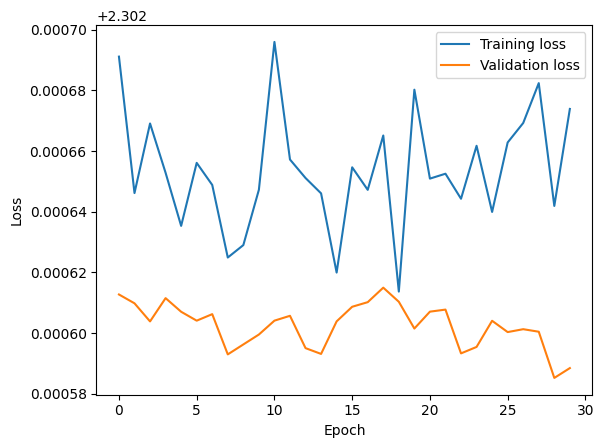

Accuracy: 0.1, Recall: 0.1, F1-score: 0.01818181818181818


In [ ]:
# Huấn luyện mô hình
training_loop(
    n_epochs=30,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=test_loader  # Sử dụng tập test để đánh giá
)

# Hàm đánh giá mô hình trên tập test
def evaluate_model(model, test_loader):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)  # Di chuyển dữ liệu lên GPU
            outputs = model(imgs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.tolist())
            all_predictions.extend(predicted.tolist())

    accuracy = accuracy_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    return accuracy, recall, f1

# Đánh giá mô hình trên tập test
accuracy, recall, f1 = evaluate_model(model, test_loader)
print(f'Accuracy: {accuracy}, Recall: {recall}, F1-score: {f1}')

#### **Ex 4**: Tại sao khi build model, càng những layer phía sau, width và height giảm nhưng depth lại tăng

Khi build model, càng những layer phía sau, width và height giảm nhưng depth lại tăng là do:

Sự giảm width và height trong các lớp sau là kết quả của việc áp dụng convolutional layers với stride (bước nhảy) khác nhau. Khi stride lớn hơn 1, width và height của tensor đầu ra sẽ giảm đi, ngược lại, nếu stride bằng 1, chúng sẽ giữ nguyên so với tensor đầu vào. Tăng depth của mạng là do việc sử dụng nhiều filter (bộ lọc) khác nhau trong convolutional layers. Mỗi filter sẽ học một đặc trưng riêng biệt của dữ liệu đầu vào, và khi số lượng filter tăng, mạng có khả năng học được nhiều đặc trưng đa dạng hơn, nâng cao khả năng dự đoán của mô hình.

#### **Ex 5**: 1 bài viết hay bao gồm tool sử dụng để vísualize CNN model

https://www.miai.vn/2021/01/06/nhin-doi-theo-cach-cua-mang-cnn-visualize-feature-maps-heatmap/